Student Performance Indicator

Life cycle of the Machine learning project
1. Problem statement
2.Data Collection
3. Data Understanding
4.Data preprocessing(cleaned,transformed and preparatory data for analysis)
5.Exploratory Data analysis
6.Feature engineering
7.Model training
8.choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [4]:
pip install matplotlib

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ------- ------------------------------- 30.7/165.9 kB 1.3 MB/s eta 0:00:01
     -------------------------------------  163.8/165.9 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 16.2 MB/s eta 0:00:01
   --- ------------------------------------ 0.7/8.0 MB 14.0 MB/s eta 0:00:01
   --- ------------------------------------ 0.7/8.0 MB 7.9 MB/s eta 0:00:01
   --- ------------------------------------ 0.7/8.0 MB 7.9 MB/s eta 0:00:01
   ----- ---------------------------------- 1.2/8.0 MB 5.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/8.0 MB 5.2 MB/s eta 0:00:02
   -------- ------------------------------- 1.7/8.0 MB 5.1 MB/s eta 0:00:02
   --------- ------------------------------ 1.9/8.0 MB 4.9 MB/s eta 0:00:02
   -----

In [5]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/294.9 kB 640.0 kB/s eta 0:00:01
   ------ -------------------------------- 51.2/294.9 kB 650.2 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing the CSV data file as DataFrame

In [32]:
study_df = pd.read_csv('data/stud.csv')

Show Top 5 Records

In [8]:
study_df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

3.1 check missing values

In [13]:
study_df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

3.2 check Duplicates

In [19]:
import numpy as np

In [20]:
study_df.duplicated().sum()

np.int64(0)

3.3 check datatypes

In [21]:
study_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Check the number of unique values of each column

In [31]:
# to get all the unique values in all columns nunique and if we want in single column we can use unique
##for single column
#study_df['gender'].unique()
study_df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 statistics of the dataset

In [32]:
study_df.describe()
#we have only the three numerical feature so we got only for 3 columns

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

3.6 Check various categories present in the different categorical column


In Python, the print function has an optional end parameter that specifies what to print at the end of the output. By default, the end parameter is set to '\n' (newline), which means that each call to print ends with a newline character, causing the next output to be printed on a new line.
You can change the end parameter to any string of your choice to modify this behavior. For example, you can use an empty string (''), a space (' '), or any other string to control how the output appears.

In [42]:
study_df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [47]:
print("categories avaiable in the gender category : ",end  = "")
print(study_df['gender'].unique())

print("\ncategories avaiable in the race_ethnicity category : ",end  = "")
print(study_df['race_ethnicity'].unique())

print("\ncategories avaiable in the parental_level_of_education category : ",end  = "")
print(study_df['parental_level_of_education'].unique())

print("\ncategories avaiable in the lunch category : ",end  = "")
print(study_df['lunch'].unique())

categories avaiable in the gender category : ['female' 'male']

categories avaiable in the race_ethnicity category : ['group B' 'group C' 'group A' 'group D' 'group E']

categories avaiable in the parental_level_of_education category : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

categories avaiable in the lunch category : ['standard' 'free/reduced']


# define numerical & categorical columns

In [64]:
numerical_features = study_df.select_dtypes(exclude=object)

categorical_features = study_df.select_dtypes(include=object)

print("we have {} numerical features : {}" .format(len(numerical_features.columns),list(numerical_features.columns)))

print("\nwe have {} categorical features : {}".format(len(categorical_features.columns),list(categorical_features.columns)))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


3.8 Adding columns for "Total Score" and "Average"

In [33]:
study_df['total_score'] = study_df['math_score']+study_df['reading_score']+study_df['writing_score']
study_df['average'] = study_df['total_score']/3

In [68]:
study_df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

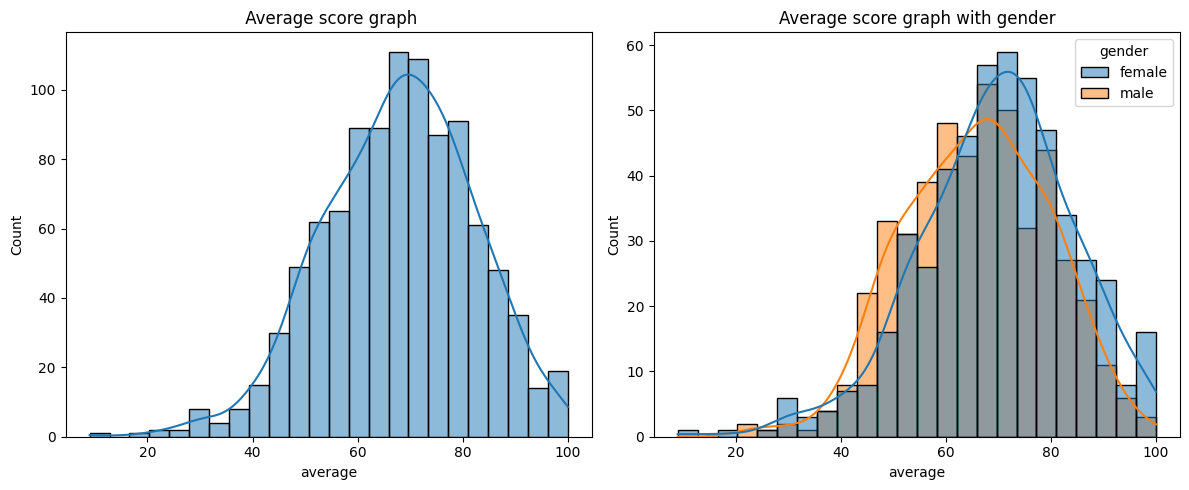

In [21]:
#1*2 grid means with 1 rows and 2 columns and if we want to have 3 figures give 1*3
##plt.show is not used in some IDES graphs may not be displayed
fig,axes = plt.subplots(1,2,figsize = (12,5))
sns.histplot(study_df,x = 'average',kde = True,ax= axes[0])
axes[0].set_title(" Average score graph")

sns.histplot(study_df,x = 'average',kde = True,hue='gender',ax = axes[1])
axes[1].set_title('Average score graph with gender')

plt.tight_layout()

plt.show()

##by default kde will be the false


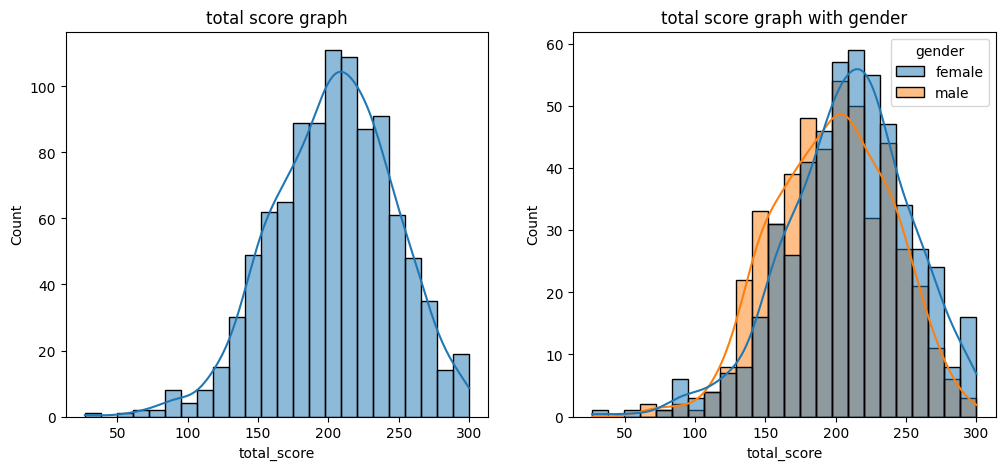

In [24]:
fig,axes = plt.subplots(1,2,figsize= (12,5))
sns.histplot(study_df,x = 'total_score',kde = True,ax = axes[0])
axes[0].set_title('total score graph')

sns.histplot(study_df,x = 'total_score',kde = True,hue='gender',ax = axes[1])
axes[1].set_title("total score graph with gender")
plt.show()

##by default kde will be the false


Insights:
Female students performing more than the male students

In [89]:
#sns.histplot(study_df,x='total_score',bins = 70,kde=True)
#check on why bins is needed

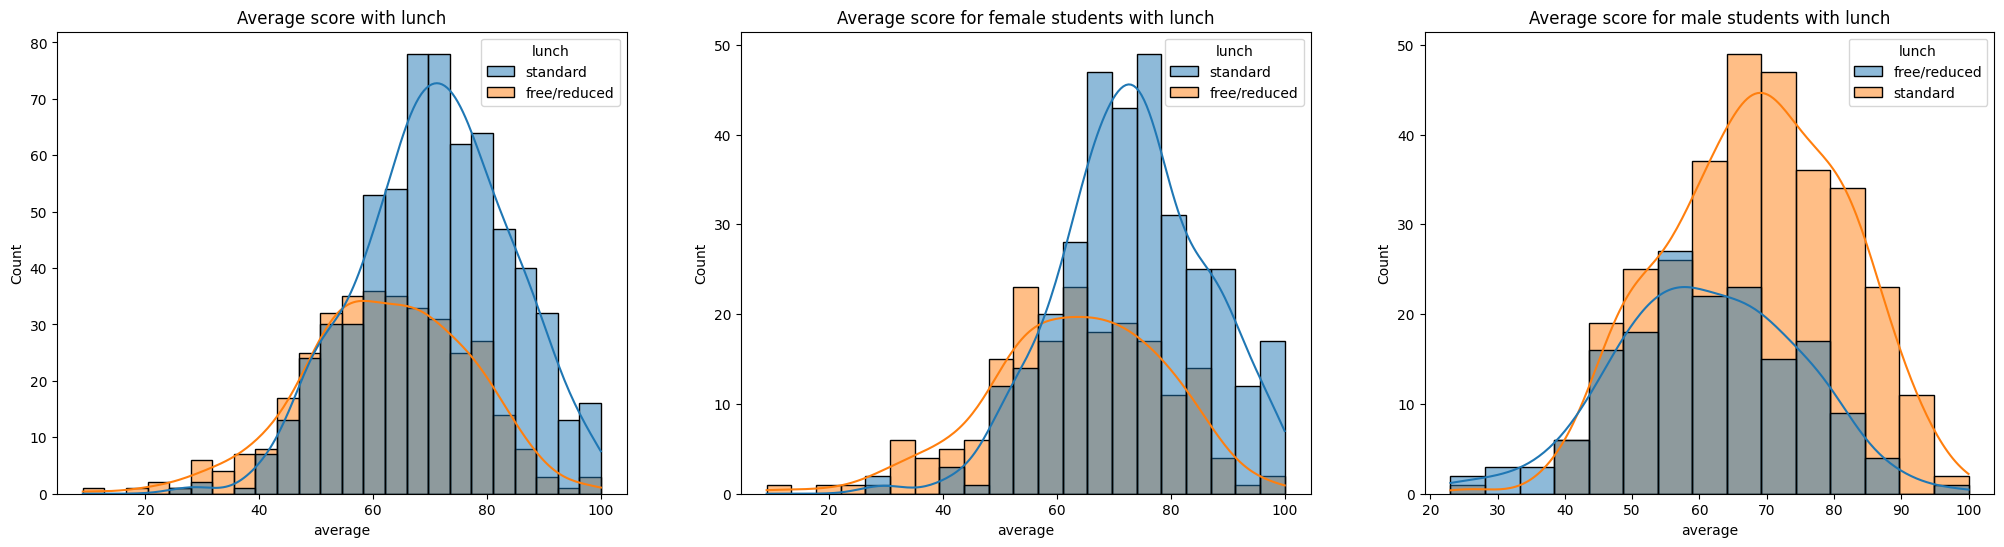

In [27]:
fig,axes = plt.subplots(1,3,figsize = (25,6))
sns.histplot(data=study_df,x = 'average',kde=True,hue= 'lunch',ax = axes[0])
axes[0].set_title("Average score with lunch")
sns.histplot(data = study_df[study_df['gender']== 'female' ],x= 'average',kde = True,hue = 'lunch',ax=axes[1])
axes[1].set_title("Average score for female students with lunch")
sns.histplot(data = study_df[study_df['gender']== 'male' ],x= 'average',kde = True,hue = 'lunch',ax=axes[2])
axes[2].set_title("Average score for male students with lunch")

plt.show()

Insights:
standard lunch performs well when compared to the other.
standard lunch performs well for both female and male students.

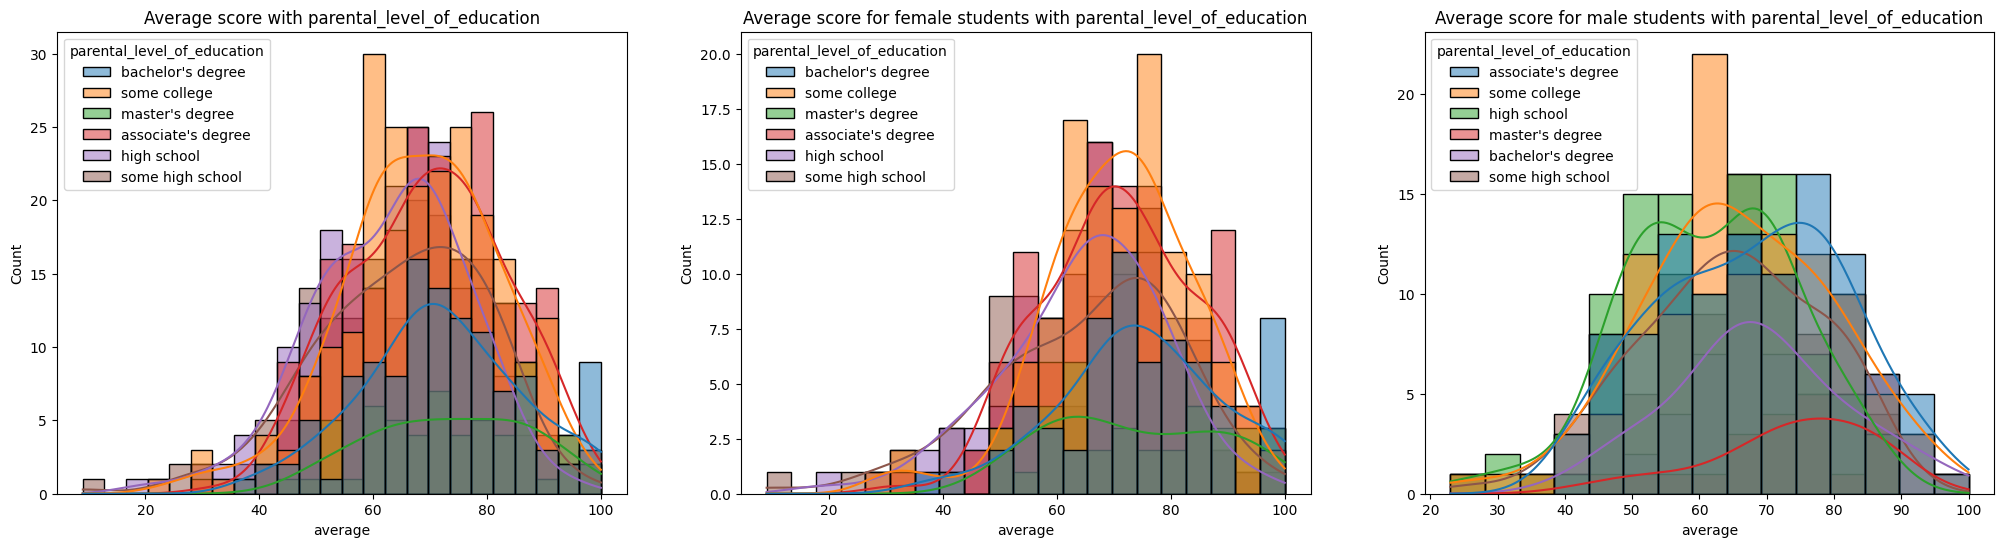

In [28]:
fig,axes = plt.subplots(1,3,figsize = (25,6))
sns.histplot(data=study_df,x = 'average',kde=True,hue= 'parental_level_of_education',ax = axes[0])
axes[0].set_title("Average score with parental_level_of_education")
sns.histplot(data = study_df[study_df['gender']== 'female' ],x= 'average',kde = True,hue = 'parental_level_of_education',ax=axes[1])
axes[1].set_title("Average score for female students with parental_level_of_education")
sns.histplot(data = study_df[study_df['gender']== 'male' ],x= 'average',kde = True,hue = 'parental_level_of_education',ax=axes[2])
axes[2].set_title("Average score for male students with parental_level_of_education")

plt.show()

Multivariate analysis using pyplot

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

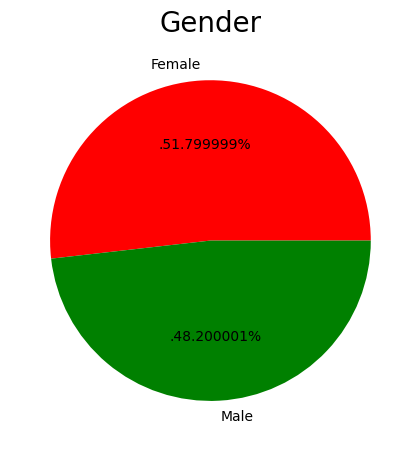

In [30]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = study_df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

Insiights: Female and male students are almost equal

In [34]:
study_df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Note: The size of each wedge/each partition is determined by comparing the value with all the other values, by using this formula:

The value divided by the sum of all values: x/sum(x)

Syntax: matplotlib.pyplot.pie(data, explode=None, labels=None, colors=None, autopct=None, shadow=False)
Parameters: 
data represents the array of data values to be plotted, the fractional area of each slice is represented by data/sum(data). If sum(data)<1, then the data values returns the fractional area directly, thus resulting pie will have empty wedge of size 1-sum(data). 
labels is a list of sequence of strings which sets the label of each wedge. 
color attribute is used to provide color to the wedges. 
autopct is a string used to label the wedge with their numerical value. 
shadow is used to create shadow of wedge. 

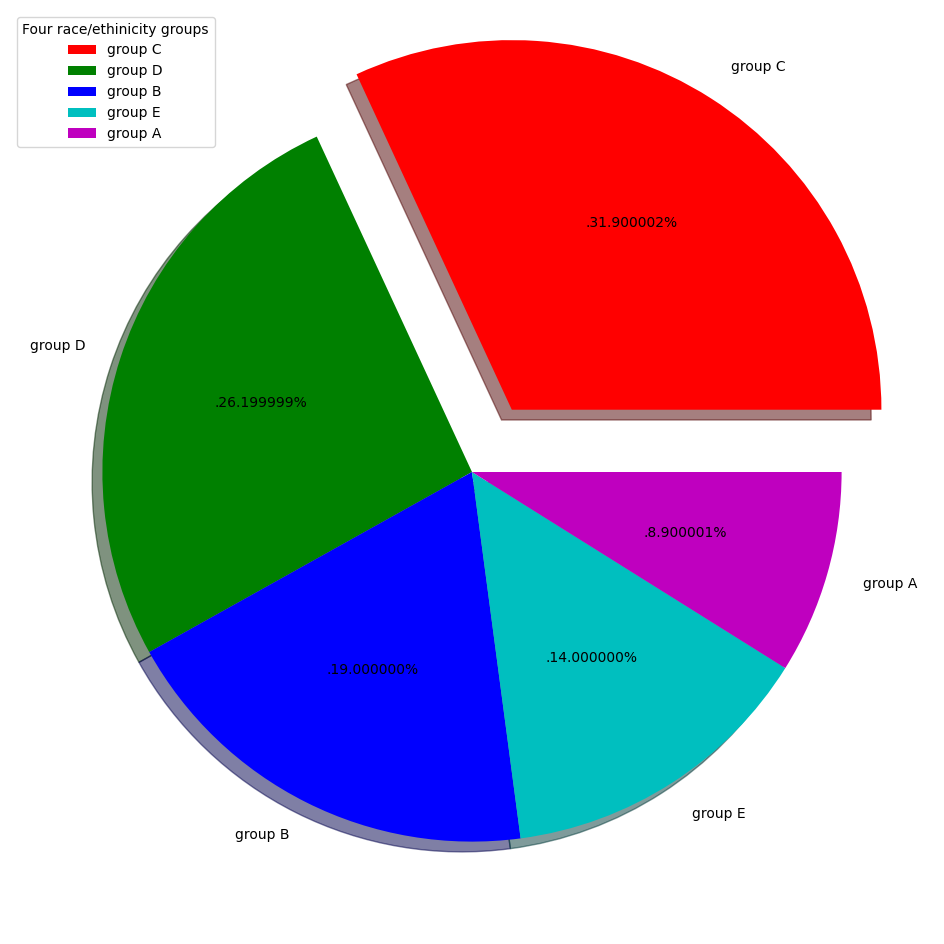

In [46]:
plt.rcParams['figure.figsize'] = (30, 12)
#plt.subplot(1, 5, 1)
size = study_df['race_ethnicity'].value_counts()
labels = ['group C','group D','group B','group E','group A'] ## order should be ,maintained as in data
my_colors = ['r','g','b','c','m']
myexplode = [0.2, 0, 0, 0,0]

plt.pie(size,labels = labels,colors = my_colors,explode=myexplode,shadow=True,autopct = '.%2f%%')
plt.legend(title = 'Four race/ethinicity groups') ##wit this will get the title and list down as in left side
plt.show()

##with explode mentioning one of the part will be seperated
#startangle parameter also will be available y default it will be 0 and u can change it.try changing it to 90
#with shadow u can see the gry colored line

Insights.No of students in Group C are more when compared to the other group students

In [48]:
study_df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

need to anlyse individual feature with piechart

#### Feature Wise Visualization
#### GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?
##do it later its priority

In [50]:
study_df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


 CHECKING OUTLIERS

<Axes: ylabel='math_score'>

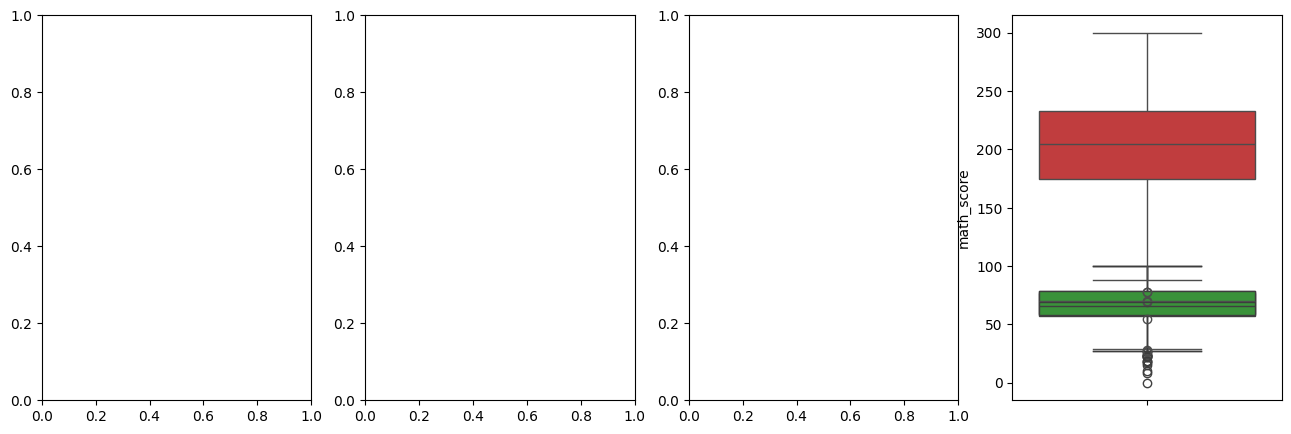

In [51]:
plt.subplots(1,4,figsize = (16,5))
sns.boxplot(study_df['math_score'])
sns.boxplot(study_df['reading_score'])
sns.boxplot(study_df['writing_score'])
sns.boxplot(study_df['total_score'])

<Axes: ylabel='total_score'>

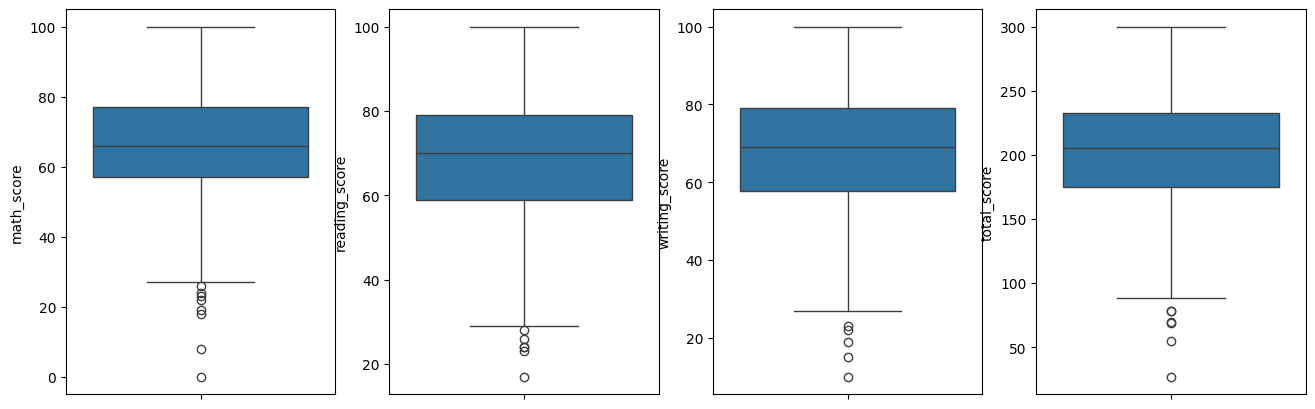

In [66]:
plt.subplots(1,4,figsize = (16,5),)
plt.subplot(141)
sns.boxplot(study_df['math_score'])
plt.subplot(142)
sns.boxplot(study_df['reading_score'])
plt.subplot(143)
sns.boxplot(study_df['writing_score'])
plt.subplot(144)
sns.boxplot(study_df['total_score'])

outliers are on the lower side and present in all four columns

1. complete the pending analysis
2.Learn how to adjust the figures size and to plot all the figures in line

Checking outliers

In [ ]:
plt.subplots(1,4,figsize =(16,5))
